# Triangles
Generate small triangles randomly in the canvas.
Each triangle has a unique id and a random color in the color palette

```cpp
root > .x triangles.C
```

Then click on any triangle. A message showing the triangle number
and its color will be printed.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:45 AM.</small></i>

 A helper function is created: 

In [1]:
%%cpp -d
void TriangleClicked() {
   //this action function is called whenever you move the mouse
   //it just prints the id of the picked triangle
   //you can add graphics actions instead
   int event = gPad->GetEvent();
   if (event != 11) return; //may be comment this line
   TObject *select = gPad->GetSelected();
   if (!select) return;
   if (select->InheritsFrom(TPolyLine::Class())) {
      TPolyLine *pl = (TPolyLine*)select;
      printf("You have clicked triangle %d, color=%d\n",
              pl->GetUniqueID(),pl->GetFillColor());
   }
}

 Arguments are defined. 

In [2]:
Int_t ntriangles=50;

In [3]:
TCanvas *c1 = new TCanvas("c1","triangles",10,10,700,700);
TRandom r;
Double_t dx = 0.2; Double_t dy = 0.2;
Int_t ncolors = gStyle->GetNumberOfColors();
Double_t x[4],y[4];
TColor *c;
Int_t ci;
for (Int_t i=0;i<ntriangles;i++) {
   x[0] = r.Uniform(.05,.95); y[0] = r.Uniform(.05,.95);
   x[1] = x[0] + dx*r.Rndm(); y[1] = y[0] + dy*r.Rndm();
   x[2] = x[1] - dx*r.Rndm(); y[2] = y[1] - dy*r.Rndm();
   x[3] = x[0];               y[3] = y[0];
   TPolyLine *pl = new TPolyLine(4,x,y);
   pl->SetUniqueID(i);
   ci = ncolors*r.Rndm();
   c  = gROOT->GetColor(TColor::GetColorPalette(ci));
   c->SetAlpha(r.Rndm());
   pl->SetFillColor(ci);
   pl->Draw("f");
}
c1->AddExec("ex","TriangleClicked()");

Draw all canvases 

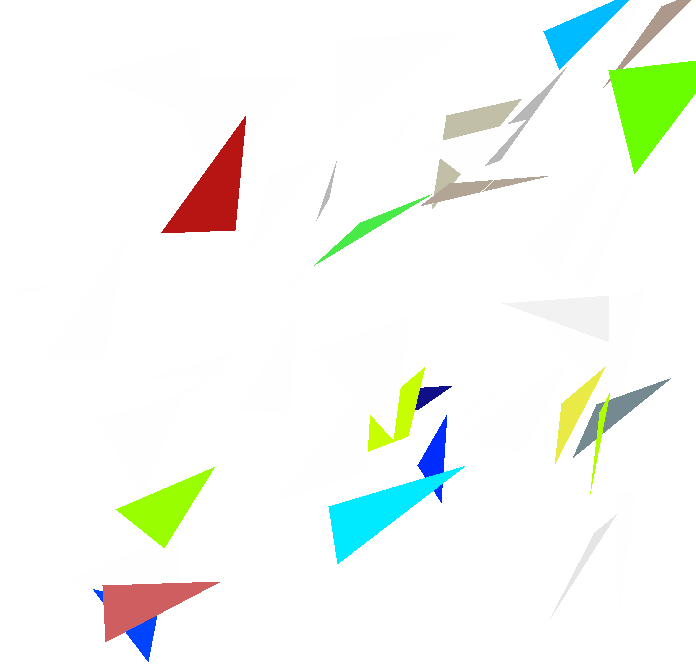

In [4]:
gROOT->GetListOfCanvases()->Draw()